In [1]:
from keras.datasets import cifar10
import numpy as np; 
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
from numpy import argmax
import matplotlib.pyplot as plt;   
import time

In [4]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

(50000, 32, 32, 3) (50000, 1)
[9]


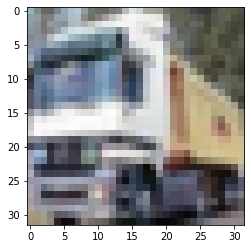

[4]


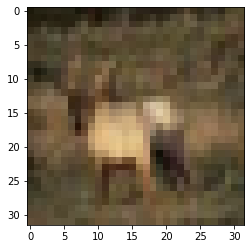

[1]


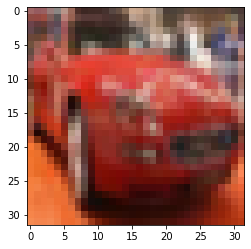

[7]


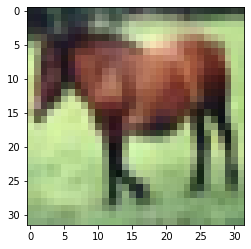

[3]


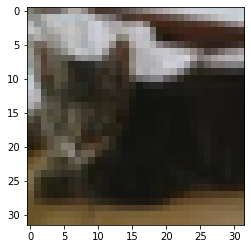

[7]


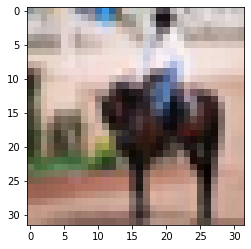

[2]


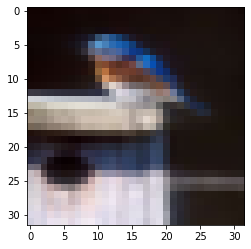

[9]


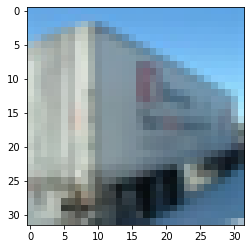

[3]


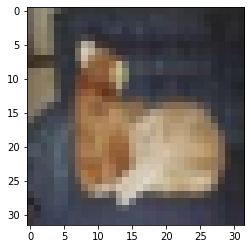

[6]


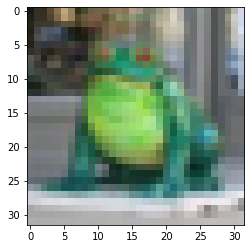

In [5]:
print(x_train.shape, y_train.shape)

"""
[0] airplane
[1] car
[2] bird
[3] cat
[4] deer
[5] dog
[6] frog
[7] horse
[8] ship
[9] truck
"""

for j in range(1,20,2):
            print(y_train[j])
            plt.imshow(x_train[j][:,:,:],cmap ='gray') 
            plt.show()
            time.sleep(0.1) 


In [6]:
num_classes=10
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [7]:
x_train  /= 255
x_test /= 255

In [8]:
num_classes = 10
def baseline_model():
	# create model
    model = Sequential()
    model.add(Conv2D(32, (5, 5), input_shape=(32, 32, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu')) # HIDDEN LAYER
    model.add(Dense(num_classes, activation='softmax'))
    	# Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [9]:
def baseline_model2():
	# create model
    model = Sequential()
    model.add(Conv2D(32, kernel_size = 5, padding = 'same', input_shape=(32, 32, 3), activation='relu'))
    #model2.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))
    model.add(Conv2D(64, kernel_size = 5, padding = 'same', activation='relu'))
    #model2.add(Activation('relu'))
    #model.add(ZeroPadding2D((1, 1), input_shape=(img_rows, img_cols, channel)))
    model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))
    
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    #model2.add(Activation("relu"))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes,activation='softmax'))
    #model2.add(Activation('softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [10]:
model = baseline_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 128)               802944    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 806,666
Trainable params: 806,666
Non-trainable params: 0
__________________________________________________

In [16]:
# 32 examples in a mini-batch, 
#smaller batch size means more updates in one epoch

# repeat 10 times 

# Fit the model
model.fit(x_train, y_train, epochs=30, batch_size=32, verbose=2)

Epoch 1/30
1563/1563 - 36s - loss: 0.4677 - accuracy: 0.8375 - 36s/epoch - 23ms/step
Epoch 2/30
1563/1563 - 36s - loss: 0.4182 - accuracy: 0.8543 - 36s/epoch - 23ms/step
Epoch 3/30
1563/1563 - 36s - loss: 0.3711 - accuracy: 0.8713 - 36s/epoch - 23ms/step
Epoch 4/30
1563/1563 - 37s - loss: 0.3258 - accuracy: 0.8862 - 37s/epoch - 23ms/step
Epoch 5/30
1563/1563 - 30s - loss: 0.2832 - accuracy: 0.9019 - 30s/epoch - 19ms/step
Epoch 6/30
1563/1563 - 30s - loss: 0.2461 - accuracy: 0.9145 - 30s/epoch - 19ms/step
Epoch 7/30
1563/1563 - 32s - loss: 0.2179 - accuracy: 0.9241 - 32s/epoch - 20ms/step
Epoch 8/30
1563/1563 - 32s - loss: 0.1985 - accuracy: 0.9322 - 32s/epoch - 20ms/step
Epoch 9/30
1563/1563 - 31s - loss: 0.1715 - accuracy: 0.9417 - 31s/epoch - 20ms/step
Epoch 10/30
1563/1563 - 32s - loss: 0.1615 - accuracy: 0.9448 - 32s/epoch - 20ms/step
Epoch 11/30
1563/1563 - 35s - loss: 0.1425 - accuracy: 0.9524 - 35s/epoch - 22ms/step
Epoch 12/30
1563/1563 - 33s - loss: 0.1266 - accuracy: 0.9567 -

In [13]:
scores = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy rate: %.2f" % (100*scores[1]))
print("CNN Error: %.2f%%" % (100-scores[1]*100))
#63.77 for 10 epochs


Accuracy rate: 63.77
CNN Error: 36.23%


In [14]:
from sklearn.metrics import classification_report, confusion_matrix

313/313 - 3s - 3s/epoch - 8ms/step
0 1000
1 1000
2 1000
3 1000
4 1000
5 1000
6 1000
7 1000
8 1000
9 1000
[[600  43 112  34  28   5  29  18  75  56]
 [ 17 787  16  22   4   5  14   8  25 102]
 [ 46  12 551  83 107  68  67  45  13   8]
 [ 15  13 105 502  70 147  81  46  13   8]
 [ 16   4  95  96 587  29  68  89   9   7]
 [  9   0  98 230  49 470  57  69  11   7]
 [  8   9  71  86  57  21 737   8   0   3]
 [ 10   3  50  59  72  55  12 721   3  15]
 [ 75  69  37  29  15   8  17   4 714  32]
 [ 18 125  25  30   3   9  18  30  34 708]]


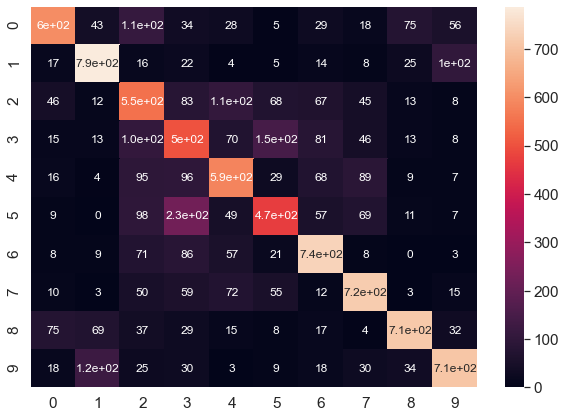

'\n[0] airplane\n[1] car\n[2] bird\n[3] cat\n[4] deer\n[5] dog\n[6] frog\n[7] horse\n[8] ship\n[9] truck\n'

In [15]:
Y_pred = model.predict(x_test, verbose=2)
y_pred = np.argmax(Y_pred, axis=1)
for ix in range(10):
    print(ix, confusion_matrix(np.argmax(y_test,axis=1),y_pred)[ix].sum())
cm = confusion_matrix(np.argmax(y_test,axis=1),y_pred)
print(cm)
 
# Visualizing of confusion matrix
import seaborn as sn
import pandas  as pd
 
df_cm = pd.DataFrame(cm, range(10),
                  range(10))
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 12})# font size
plt.show()

"""
[0] airplane
[1] car
[2] bird
[3] cat
[4] deer
[5] dog
[6] frog
[7] horse
[8] ship
[9] truck
"""